# Coronavirus affect on Flights in the U.S.


## Investigation Overview

This year we saw the advent of the Coronavirus outbreak and pandemic. As of July, new daily cases are still rising here in the United States and travel restrictions, whether they be government mandated or self imposed by the population, are changing the demand for airline travel.

The interface on the Bureau of Transportation and Statistics allows for users to manually download sets of flight data from its [website](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236).  For this analysis we will be sticking with 2 months worth of data, specifically the periods of **April 2019** and **April 2020**.  I wish to see if there are any significant trends in Airline usage or performance during the Cronovirus pandemic.

## Dataset Overview

This dataset is a single table that is composed of individual flight statistics. This includes attributes such as time of take of and landing, point of origin, delay, etc.

Structure is 925,405 observations with 35 separate attributes. Most of these are quantitative, but there are also categorical values related to identifiying point of origin, destination, flight, and carrier.  We will also use some numerical categorical variables such as year or day of the week.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#create dataframes
apr19 = pd.read_csv('Data/Apr2019_flights.csv')
apr20 = pd.read_csv('Data/Apr2020_flights.csv')
#create master dataframe
frames = [apr19, apr20]
flights = pd.concat(frames)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Flight Count in April 2019 vs 2020

The first place to start looking for changes in flights during coronavirus would be the general count.  Due to the added risk of exposure that comes with traveling, one would expect to see a decrease in overal count. 

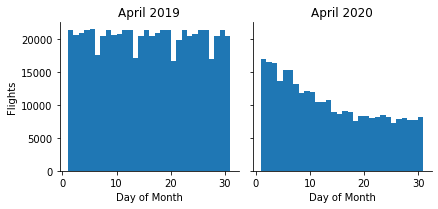

In [3]:
default_color = sb.color_palette()[0]
bins = np.arange(1, 31+1, 1)
g = sb.FacetGrid(data = flights, col = 'YEAR')
g.map(plt.hist, "DAY_OF_MONTH",bins = bins);

axes = g.axes.flatten()
#axes[0].set_title = ('April 2019')
#axes[1].set_title = ('April 2020')

axes[0].set_title('April 2019')
axes[1].set_title('April 2020')
axes[0].set_ylabel('Flights')
axes[0].set_xlabel('Day of Month')
axes[1].set_xlabel('Day of Month');

And that is exactly what we see.  There is not only a lower value at the beginning of the month compared to last year, but there is also a stead downward trend to the end of the month. 

## States Flight Count

Another way we can break this down is via states.  The following plot shows flgiht count for 2019 and 2020 for the top 5 states with the most total number of flights. You can see the significant drop to around 50-60% of their original amount.

In [4]:
#get top 5 states by total number of flights
#this is for cleaner graphs
top5 = []
statesOrdered = flights.ORIGIN_STATE_ABR.value_counts().index.tolist()
for x in range(len(statesOrdered)):
    if x > 4:
        break
    top5.append(statesOrdered[x])

flights_top5 = flights[flights.ORIGIN_STATE_ABR.isin(top5)]

#correct categorical data type
#to prevent filtered states from plotting
ordered_states = pd.api.types.CategoricalDtype(ordered = True, categories = top5)
flights_top5['ORIGIN_STATE_ABR'] = flights_top5['ORIGIN_STATE_ABR'].astype(ordered_states)

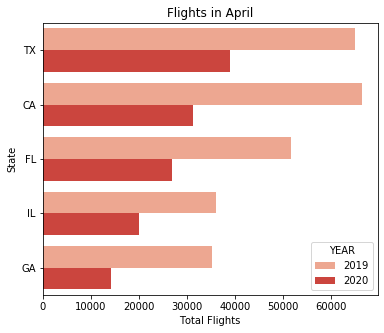

In [5]:
#Graph comparing 2019 to 2020 for each state
plt.figure(figsize = [6,5])
sb.countplot(data = flights_top5, y = 'ORIGIN_STATE_ABR', color = default_color, hue = 'YEAR', palette = 'Reds');
plt.xlabel('Total Flights')
plt.ylabel('State')
plt.title('Flights in April');

## Change in Departure Delays

Now with such a high reduction in over flights occurring, does this have any affect on delays experienced by flyers?  The infrasturcture is still there and was built to handle the expected load.  The current capacity of airports is much higher than the current demand, so one would expect there is less congestion.  That is exactly what we see.

This set of histograms compares the amount of times various delays in minutes were expereinced by flights.  The decrease in flights can definitely be seen between 2019 and 2020.  

For mean departure delays in minutes, 2019 had a 10-11 minute average delay for scheduled departure time versus actual.  In 2020 there is surprisingly a 3 minute early departure on average.  Maybe estimated departure times are based on normal capacity of airtrafic and therefore the decrease in 2020 results in more efficient departures.


In [6]:
print(apr19['DEP_DELAY'].mean())
print(apr20['DEP_DELAY'].mean())

10.628991819414965
-3.2295414514976852


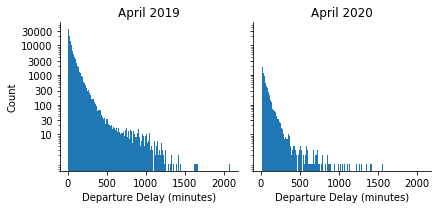

In [7]:
#comparison of amount of flights delayed by 30 minutes or more
bins = np.arange(0, 2079+10, 10)
g = sb.FacetGrid(data = flights[flights['DEP_DELAY'] >= 10], col = 'YEAR')
g.map(plt.hist, "DEP_DELAY", bins = bins)

ticks = [10,30,100, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.yscale('log')
axes = g.axes.flatten()

axes[0].set_title('April 2019')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')
axes[0].set_yticks(ticks)
axes[0].set_yticklabels(labels)
axes[0].set_yticklabels([],minor = True)
axes[0].set_xlabel('Departure Delay (minutes)')

axes[1].set_title('April 2020')
axes[1].set_yscale('log')
axes[1].set_yticks(ticks)
axes[1].set_yticklabels(labels)
axes[1].set_yticklabels([],minor = True);
axes[1].set_xlabel('Departure Delay (minutes)');

## Departure Delays per Day of the Week at SFO

Here we are looking at the relationship between arrival and departure delay depending on each day of the week for flights departing from San Francisco (SFO).  Each row represents the data from April 2019 and April 2020 respectively.  The ranges have been limited to 200 minutes for ease of viewing.

The most notable difference is the almost absence of data in 2020.  We saw earlier that there was a drop in total flight counts and for SFO in particular April 2020 was only 33% of the volume of the previous year.  Would we expect to see around 30% of the density from the first row in the second row?  As I predicted earlier, an ease on the airline system in general may allow it to operate more efficiently preventing delays.  

Along with delays being less, does a less crowded runway mean shorter time preparing for take off?  Let's use `TAXI_IN` and `TAXI_OUT`

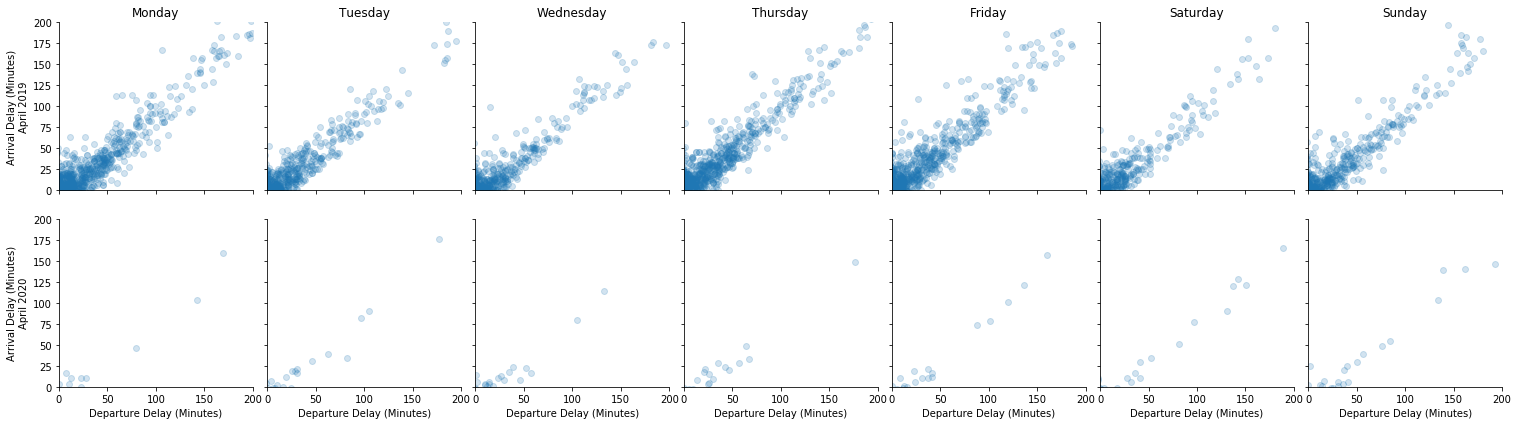

In [8]:
#Faceted Grid of scatter plots for SFO and Day's of the week.
g = sb.FacetGrid(data = flights[flights.ORIGIN == 'SFO'], col = 'DAY_OF_WEEK', row = 'YEAR')
g.map(plt.scatter, 'DEP_DELAY', 'ARR_DELAY', alpha = .2)

axes = g.axes.flatten()

axes[0].set_title("Monday")
axes[1].set_title("Tuesday")
axes[2].set_title("Wednesday")
axes[3].set_title("Thursday")
axes[4].set_title("Friday")
axes[5].set_title("Saturday")
axes[6].set_title("Sunday")

for ax in range(len(axes)):
    if ax > 6:
        axes[ax].set_title("")
        axes[ax].set_xlabel("Departure Delay (Minutes)")

axes[0].set_ylabel("Arrival Delay (Minutes)\nApril 2019")
axes[7].set_ylabel("Arrival Delay (Minutes)\nApril 2020")
    
    
plt.xlim(0, 200)
plt.ylim(0, 200);

## Conclusion

Coronavirus seems to have both lower the amount of air traffic as well as departure delays for flights.  Based on the information seen here, the lower amount of delays may be attributed towards the infrasturcture of the airline industry handling much less than planned for therefore increasing the number of resources available per flight on average.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`
> > `jupyter nbconvert "Project Flight Data - Part 2.ipynb" --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!